# Soial Media Sentiment Analysis

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

## Data preprocessing

In [2]:
sentiment_data = pd.read_csv('sentimentdataset.csv')

In [3]:
sentiment_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  732 non-null    int64  
 1   Unnamed: 0    732 non-null    int64  
 2   Text          732 non-null    object 
 3   Sentiment     732 non-null    object 
 4   Timestamp     732 non-null    object 
 5   User          732 non-null    object 
 6   Platform      732 non-null    object 
 7   Hashtags      732 non-null    object 
 8   Retweets      732 non-null    float64
 9   Likes         732 non-null    float64
 10  Country       732 non-null    object 
 11  Year          732 non-null    int64  
 12  Month         732 non-null    int64  
 13  Day           732 non-null    int64  
 14  Hour          732 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 85.9+ KB


732 entries, not a large dataset

Notice two columns are missing appropirate labels, need to label all columns with meanings and drop duplicate ones.

In [4]:
# rename columns 'unamed' to 'id'
sentiment_data.rename(columns={'Unnamed: 0': 'id'}, inplace=True)

In [5]:
sentiment_data.head()

,Unnamed: 0.1,id,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [6]:
# drop remaining column 'unamed: 0.1'
sentiment_data.drop(columns=['Unnamed: 0.1'], inplace=True)

In [7]:
# reset index as column 'id'
sentiment_data.set_index('id', inplace=True)

In [8]:
sentiment_data.head()

,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
id,,,,,,,,,,,,,
0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [9]:
# check for missing values
sentiment_data.isnull().sum()

Text         0
Sentiment    0
Timestamp    0
User         0
Platform     0
Hashtags     0
Retweets     0
Likes        0
Country      0
Year         0
Month        0
Day          0
Hour         0
dtype: int64

NULL check: no NULL value

In [10]:
# check for duplicates
sentiment_data.duplicated().sum()

20

Duplicate check: 20 duplicate values, need to eliminate

In [11]:
sentiment_data.drop_duplicates(inplace=True)

In [12]:
sentiment_data.duplicated().sum()

0

In [13]:
sentiment_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 736
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Text       712 non-null    object 
 1   Sentiment  712 non-null    object 
 2   Timestamp  712 non-null    object 
 3   User       712 non-null    object 
 4   Platform   712 non-null    object 
 5   Hashtags   712 non-null    object 
 6   Retweets   712 non-null    float64
 7   Likes      712 non-null    float64
 8   Country    712 non-null    object 
 9   Year       712 non-null    int64  
 10  Month      712 non-null    int64  
 11  Day        712 non-null    int64  
 12  Hour       712 non-null    int64  
dtypes: float64(2), int64(4), object(7)
memory usage: 77.9+ KB


## Feature Engineering

In [14]:
# how recent is this dataset?
# check the value of 'Year' column
sentiment_data['Year'].value_counts()

Year
2023    287
2019     70
2020     64
2022     60
2021     59
2018     54
2017     42
2016     38
2015     19
2011      4
2012      4
2013      4
2014      4
2010      3
Name: count, dtype: int64

Year range from 2010 to 2023, with the majority of posts (287/712) are posted in 2023.

In [15]:
# counts the top 10 most frequent words in the 'Sentiment' column
sentiment_data['Sentiment'].value_counts()

Sentiment
Positive           44
Joy                42
Excitement         32
Neutral            14
Happy              14
                   ..
Dazzle              1
Adrenaline          1
Harmony             1
ArtisticBurst       1
Elegance            1
Name: count, Length: 279, dtype: int64

Top sentiments include: positive, joy, excitement....

## Exploratory Data Analysis

Text(0.5, 1.0, 'Top 10 sentiments on social media sites')

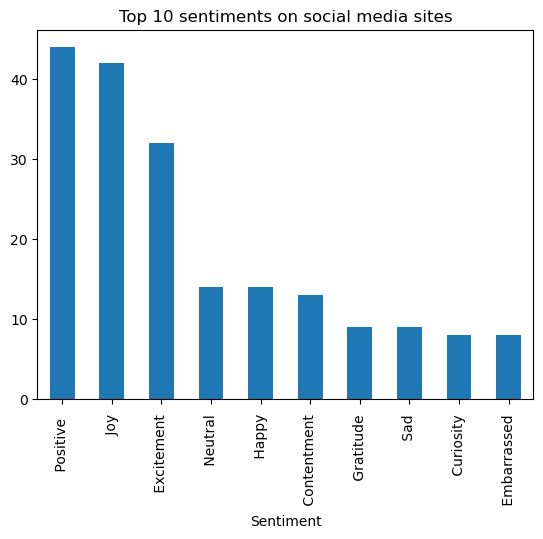

In [16]:
# Visualize the top 10 most frequent words in the 'Sentiment' column, and order by frequency in descending order
sentiment_data['Sentiment'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 sentiments on social media sites')

### Question 1: What are the nature of these sentiments? (attributing to'positive', 'negative', 'neutral')

In [17]:
# list out all sentiments
pd.set_option('display.max_rows', None)
sentiment_data['Sentiment'].value_counts()

Sentiment
Positive                 44
Joy                      42
Excitement               32
Neutral                  14
Happy                    14
Contentment              13
Gratitude                 9
Sad                       9
Curiosity                 8
Embarrassed               8
Loneliness                6
Elation                   6
Despair                   6
Hate                      6
Hopeful                   6
Bad                       6
Acceptance                5
Ambivalence               5
Serenity                  5
Nostalgia                 5
Melancholy                5
Numbness                  5
Confusion                 5
Enthusiasm                5
Indifference              5
Empowerment               5
Gratitude                 5
Contentment               5
Curiosity                 5
Determination             5
Serenity                  5
Frustrated                5
Bitterness                5
Serenity                  4
Grief                     4
Betrayal  

Noticed some sentiments are counted twice, need to trim data for accuracy

In [18]:
# convert all texts to lowercase & strip the white spaces in the 'Sentiment' column
sentiment_data['Sentiment'] = sentiment_data['Sentiment'].str.lower()
sentiment_data['Sentiment'] = sentiment_data['Sentiment'].str.strip()
sentiment_data['Sentiment'].value_counts()

Sentiment
positive                45
joy                     44
excitement              37
neutral                 18
contentment             18
gratitude               17
curiosity               16
serenity                15
happy                   14
despair                 11
nostalgia               11
grief                    9
awe                      9
sad                      9
confusion                8
embarrassed              8
acceptance               8
loneliness               8
enthusiasm               7
euphoria                 7
pride                    7
elation                  7
determination            7
regret                   6
ambivalence              6
hopeful                  6
melancholy               6
frustration              6
surprise                 6
hate                     6
inspiration              6
numbness                 6
bad                      6
indifference             6
frustrated               5
betrayal                 5
empowerment       

Many sentiments are listed here...but can they be categorized into three major groups?

In [19]:
# first analyze 'sentiment' column's sentiment using Vader and give each sentiment a score
analyzer = SentimentIntensityAnalyzer()
sentiment_data['Sentiment_Score'] = sentiment_data['Sentiment'].apply(lambda x: analyzer.polarity_scores(x)['compound'])
# based on the sentiment score of each sentiment, if 'compound' score is >= 0.05, then it is positive, if <= -0.05, then it is negative, else it is neutral
sentiment_data['Sentiment_Nature'] = sentiment_data['Sentiment_Score'].apply(lambda x: 'positive' if x >= 0.05 else 'negative' if x <= -0.05 else 'neutral')
sentiment_data.head(60)

,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour,Sentiment_Score,Sentiment_Nature
id,,,,,,,,,,,,,,,
0,Enjoying a beautiful day at the park! ...,positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12,0.5574,positive
1,Traffic was terrible this morning. ...,negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8,-0.5719,negative
2,Just finished an amazing workout! 💪 ...,positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15,0.5574,positive
3,Excited about the upcoming weekend getaway! ...,positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18,0.5574,positive
4,Trying out a new recipe for dinner tonight. ...,neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19,0.0000,neutral
5,Feeling grateful for the little things in lif...,positive,2023-01-16 09:10:00,GratitudeNow,Twitter,#Gratitude #PositiveVibes,25.0,50.0,India,2023,1,16,9,0.5574,positive
6,Rainy days call for cozy blankets and hot coc...,positive,2023-01-16 14:45:00,RainyDays,Facebook,#RainyDays #Cozy,10.0,20.0,Canada,2023,1,16,14,0.5574,positive
7,The new movie release is a must-watch! ...,positive,2023-01-16 19:30:00,MovieBuff,Instagram,#MovieNight #MustWatch,15.0,30.0,USA,2023,1,16,19,0.5574,positive
8,Political discussions heating up on the timel...,negative,2023-01-17 08:00:00,DebateTalk,Twitter,#Politics #Debate,30.0,60.0,USA,2023,1,17,8,-0.5719,negative


In [20]:
# does the 'text' column have the same sentiment nature as the 'Sentiment' column?
sentiment_data['Text_Sentiment_Score'] = sentiment_data['Text'].apply(lambda x: analyzer.polarity_scores(x)['compound'])
sentiment_data['text_Sentiment_Nature'] = sentiment_data['Text_Sentiment_Score'].apply(lambda x: 'positive' if x >= 0.05 else 'negative' if x <= -0.05 else 'neutral')
sentiment_data.head(60)

,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour,Sentiment_Score,Sentiment_Nature,Text_Sentiment_Score,text_Sentiment_Nature
id,,,,,,,,,,,,,,,,,
0,Enjoying a beautiful day at the park! ...,positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12,0.5574,positive,0.8221,positive
1,Traffic was terrible this morning. ...,negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8,-0.5719,negative,-0.4767,negative
2,Just finished an amazing workout! 💪 ...,positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15,0.5574,positive,0.6239,positive
3,Excited about the upcoming weekend getaway! ...,positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18,0.5574,positive,0.4003,positive
4,Trying out a new recipe for dinner tonight. ...,neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19,0.0000,neutral,0.0000,neutral
5,Feeling grateful for the little things in lif...,positive,2023-01-16 09:10:00,GratitudeNow,Twitter,#Gratitude #PositiveVibes,25.0,50.0,India,2023,1,16,9,0.5574,positive,0.5423,positive
6,Rainy days call for cozy blankets and hot coc...,positive,2023-01-16 14:45:00,RainyDays,Facebook,#RainyDays #Cozy,10.0,20.0,Canada,2023,1,16,14,0.5574,positive,-0.0772,negative
7,The new movie release is a must-watch! ...,positive,2023-01-16 19:30:00,MovieBuff,Instagram,#MovieNight #MustWatch,15.0,30.0,USA,2023,1,16,19,0.5574,positive,0.0000,neutral
8,Political discussions heating up on the timel...,negative,2023-01-17 08:00:00,DebateTalk,Twitter,#Politics #Debate,30.0,60.0,USA,2023,1,17,8,-0.5719,negative,0.0000,neutral


In [21]:
# compare how many rows have the same sentiment nature based on texts and labeled sentiments
sentiment_data[sentiment_data['Sentiment_Nature'] == sentiment_data['text_Sentiment_Nature']].shape[0]

505

Overall, 70.92% (505/712) sentiment data are labeled appropriately in nature(positive, negative, neutral), with only a few exception.

What are the major sentiments categorized in the three sentiment nature?

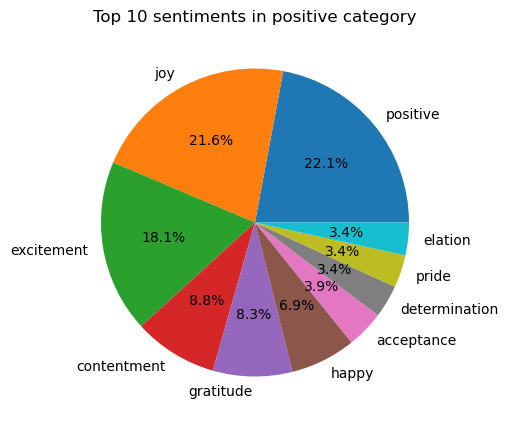

<Figure size 640x480 with 0 Axes>

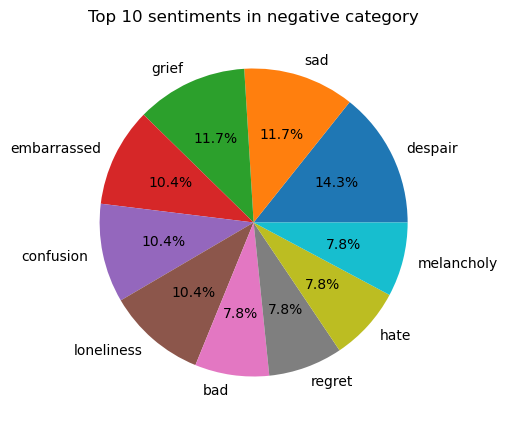

<Figure size 640x480 with 0 Axes>

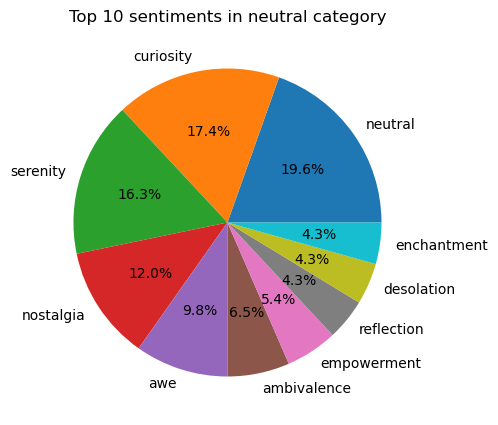

<Figure size 640x480 with 0 Axes>

In [22]:
# visualize the major sentiment composition in each category of the sentiment nature
for nature in sentiment_data['Sentiment_Nature'].unique():
    plt.figure(figsize=(10,5))
    sentiment_data[sentiment_data['Sentiment_Nature'] == nature]['Sentiment'].value_counts().head(10).plot(kind='pie', autopct='%1.1f%%')
    plt.title(f'Top 10 sentiments in {nature} category')
    plt.ylabel('')
    plt.show()
    plt.savefig(f'top_ten_sentiments_in_{nature}.png')

Based on these three pie charts, most sentiments categorized in 'positive' and 'negative' are resonable, but some sentiments listed in 'neutral' is are questionable. <br><br>Ex. 'awe', 'empowerment', and 'enchantment' should be labeled 'positive', <br>whereas 'desolation' and 'nostalgia' should be labeled 'negative'.

### Question 2: How did sentiments change over year?

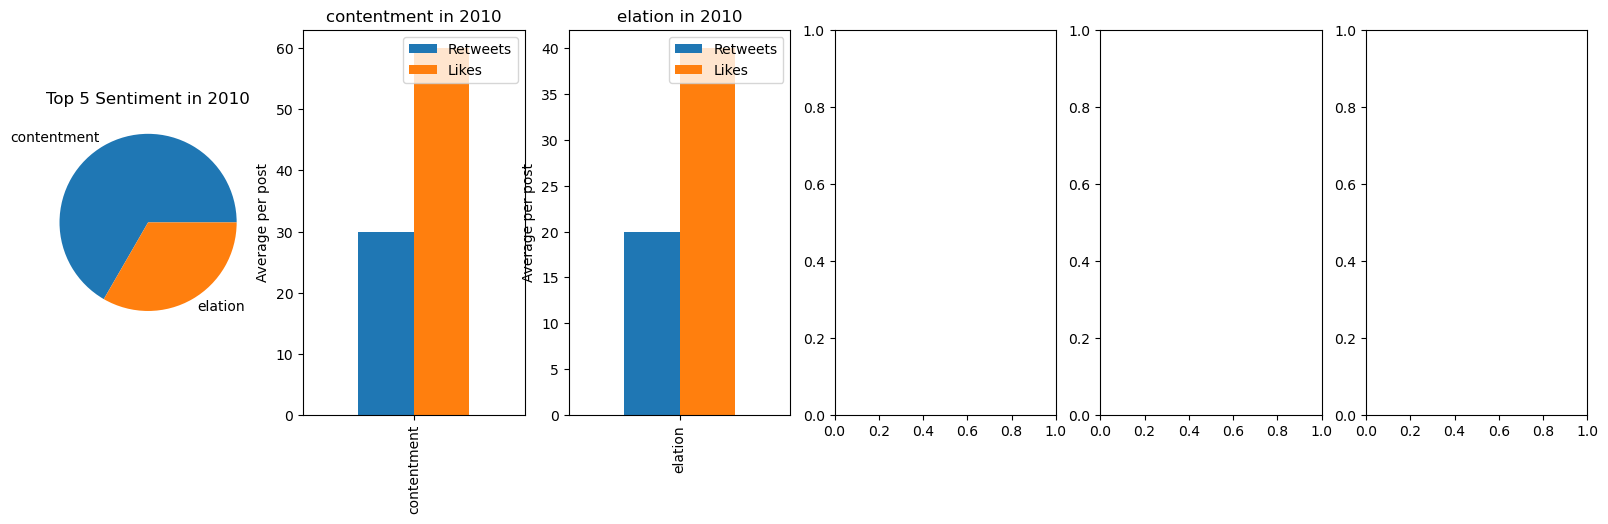

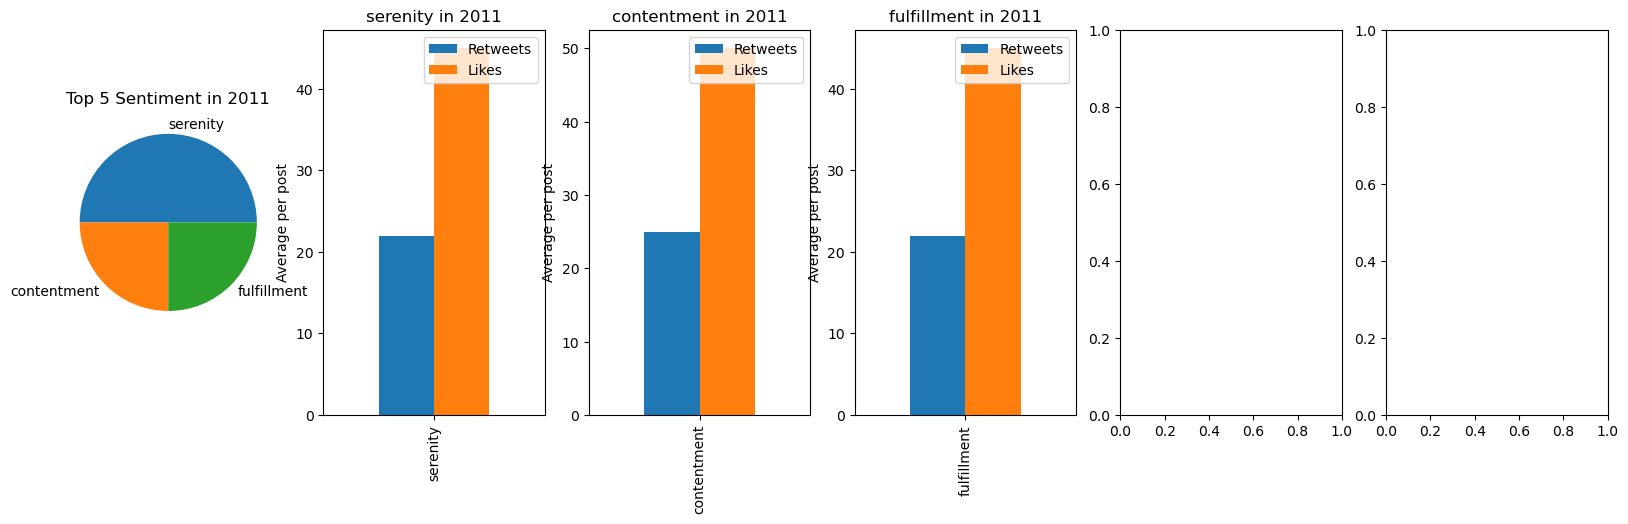

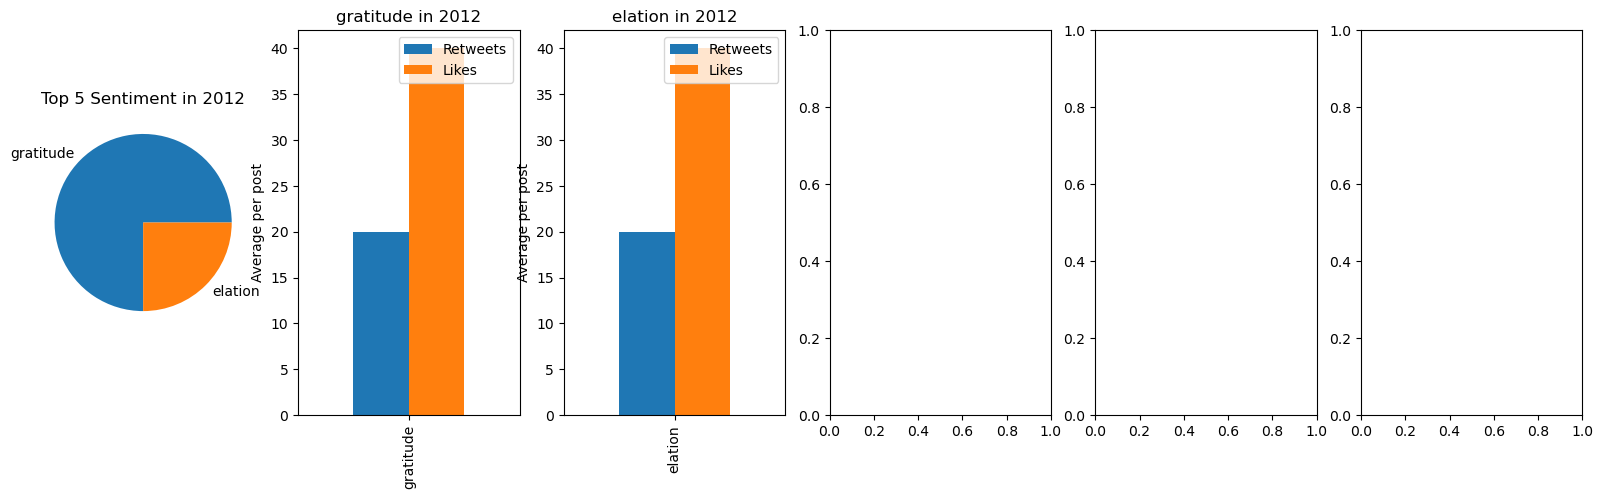

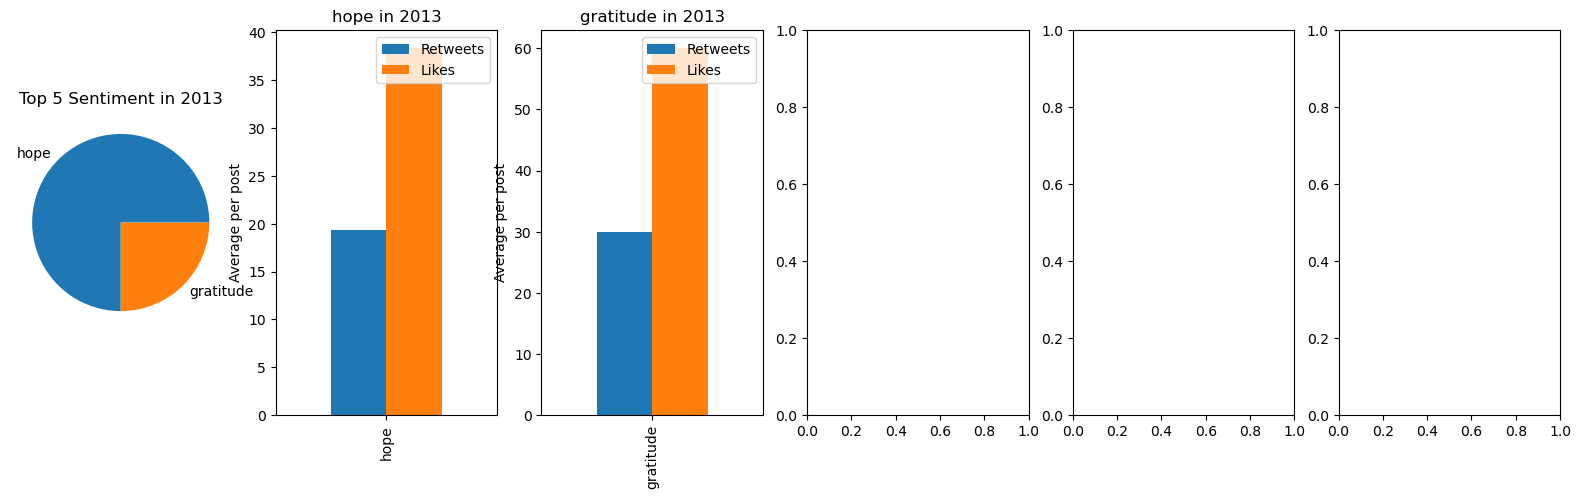

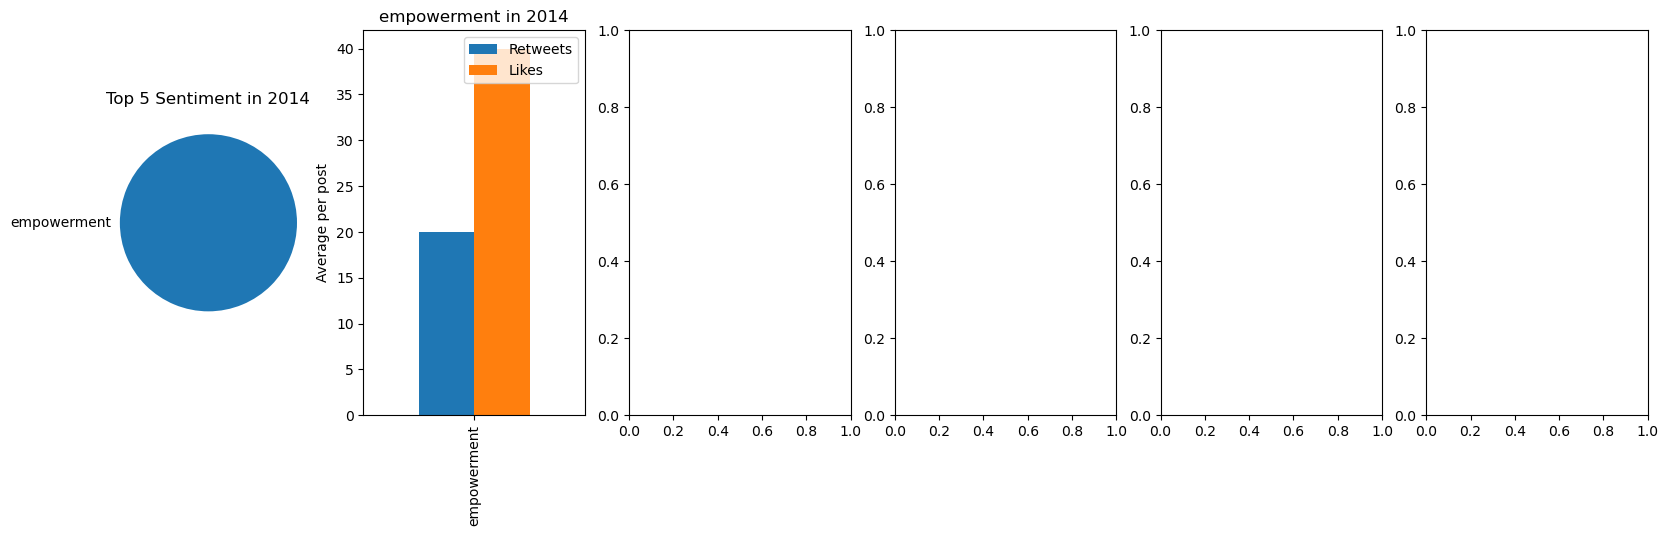

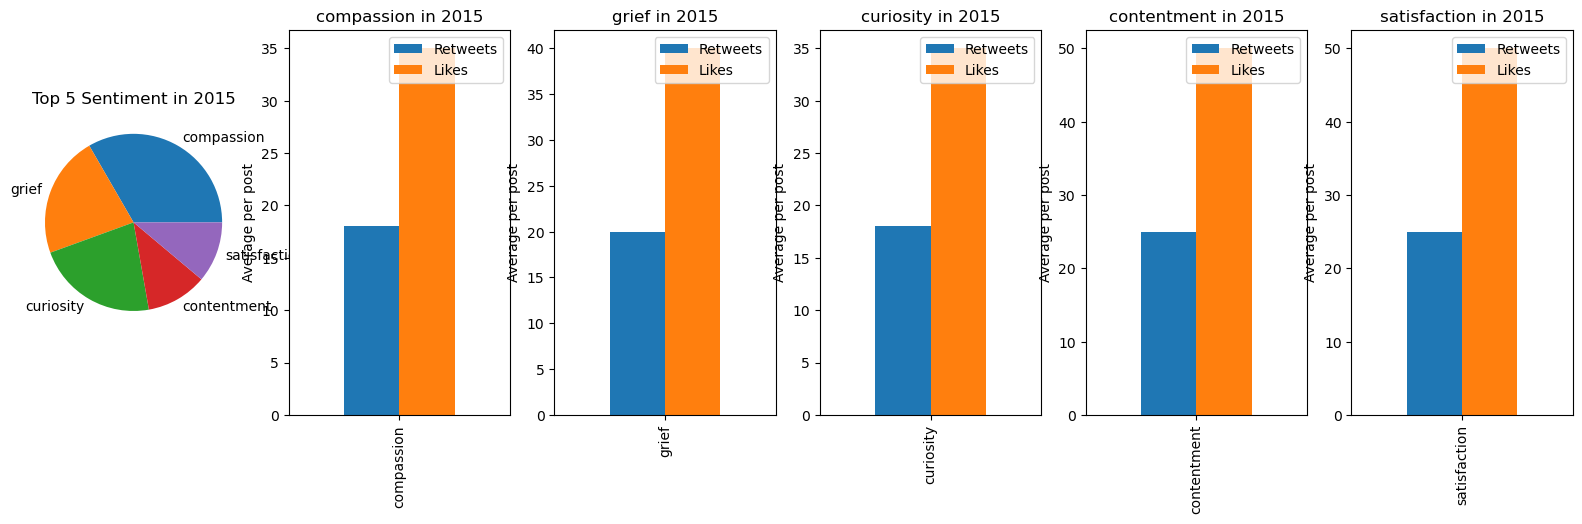

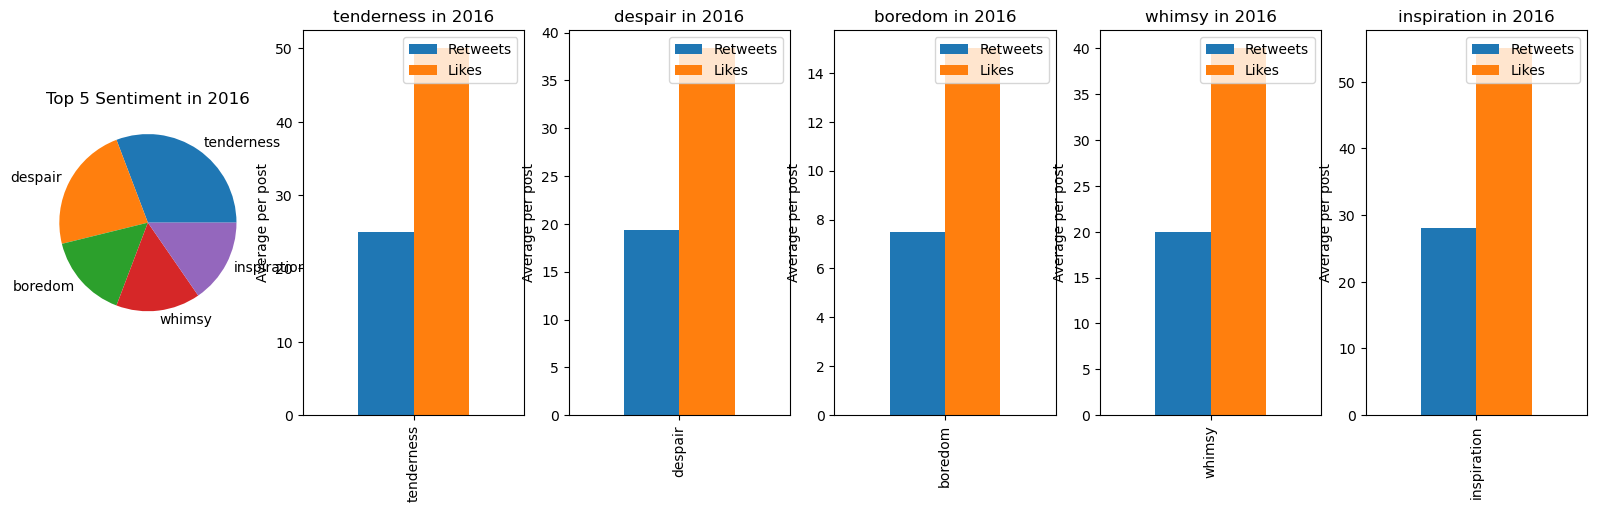

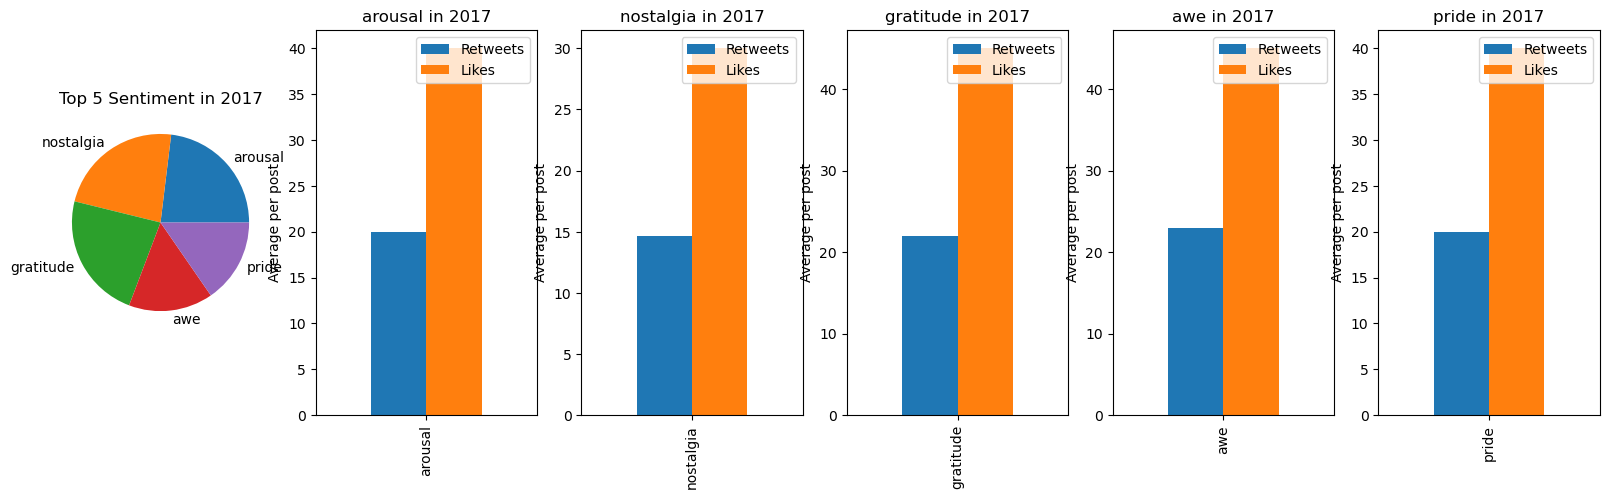

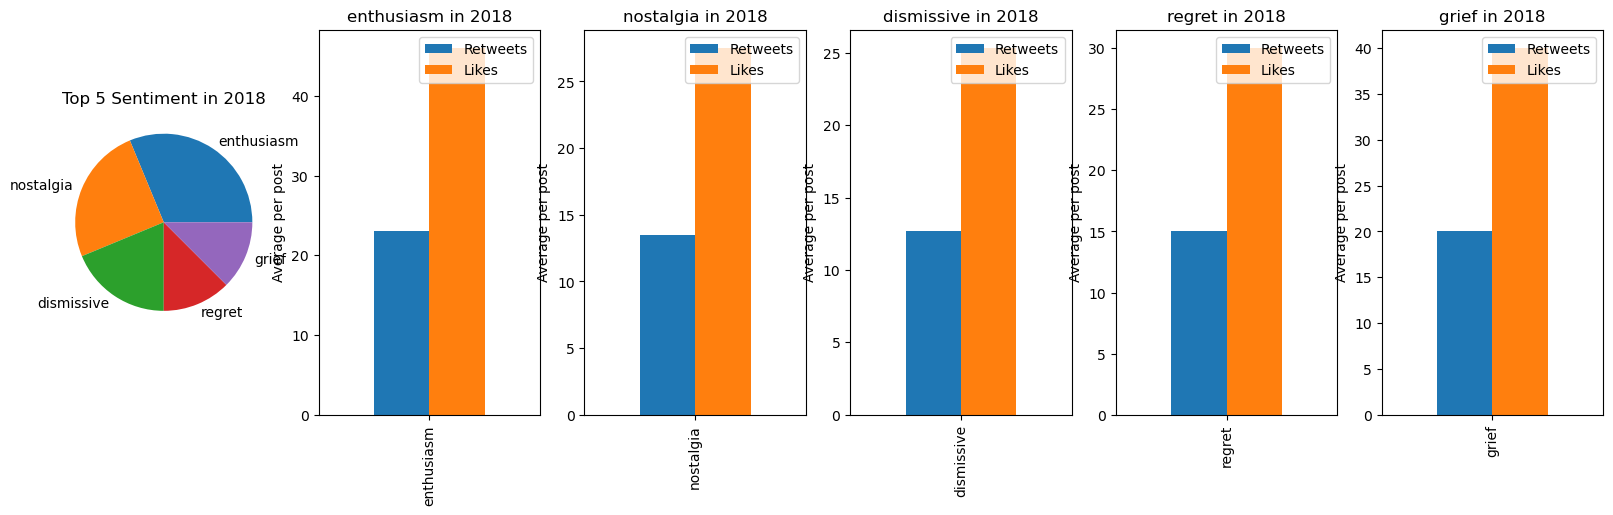

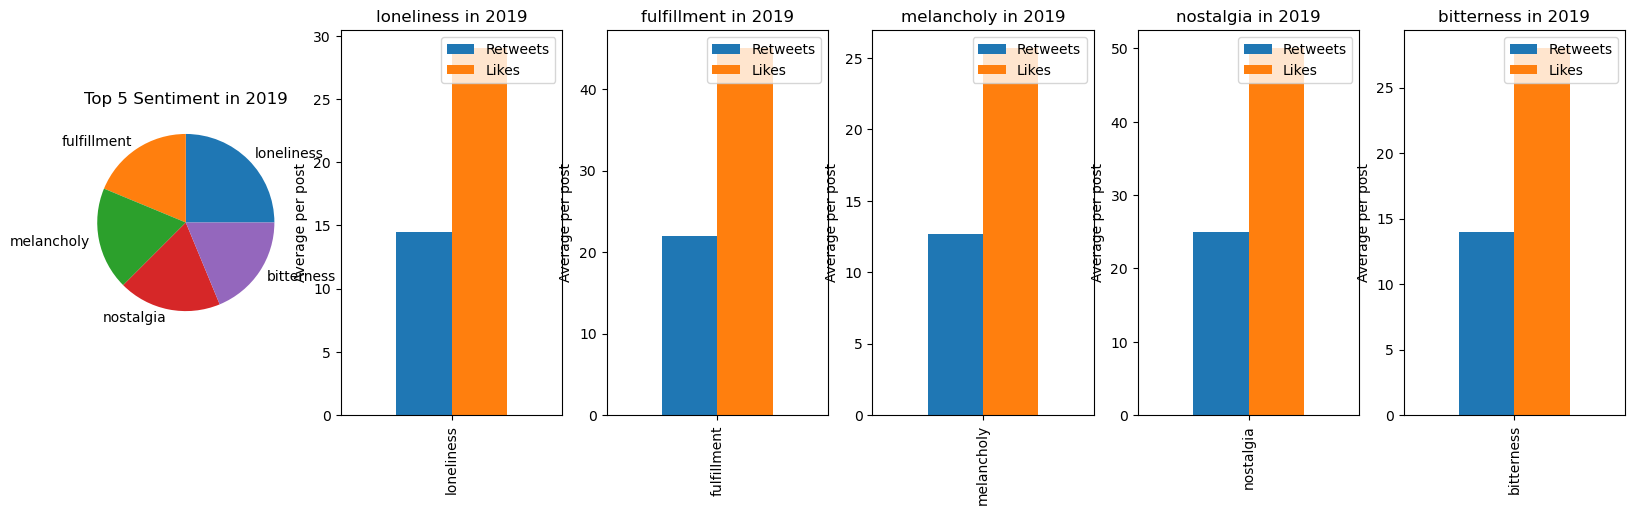

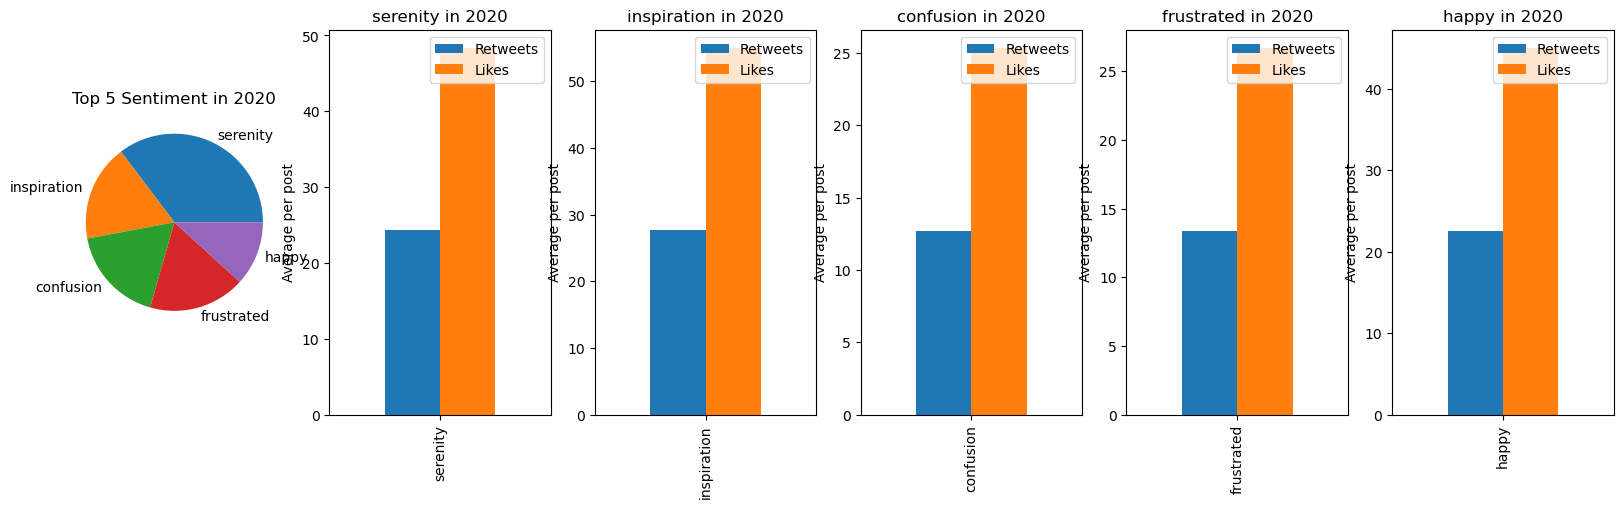

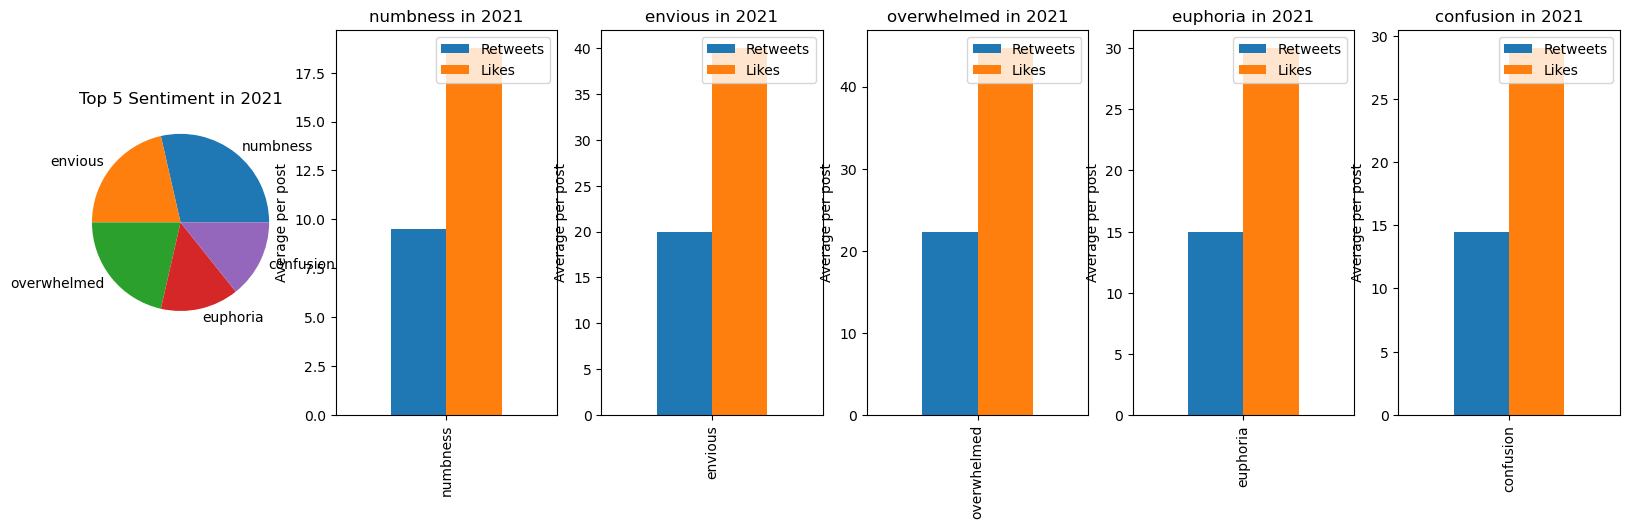

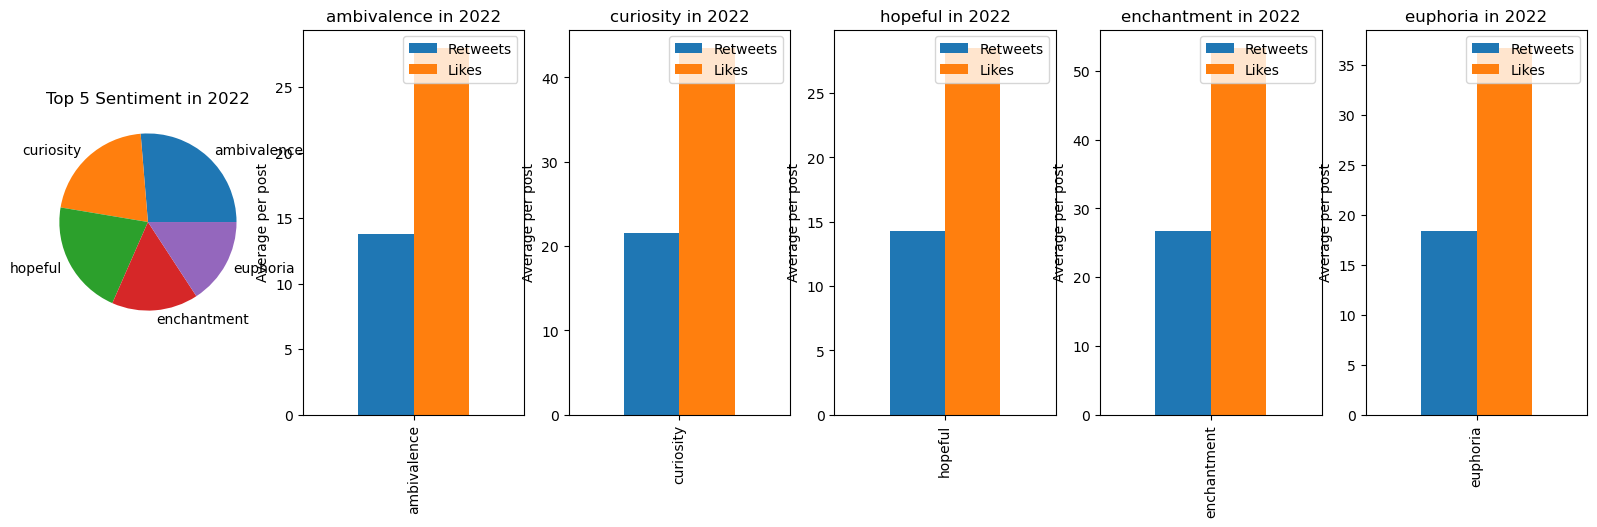

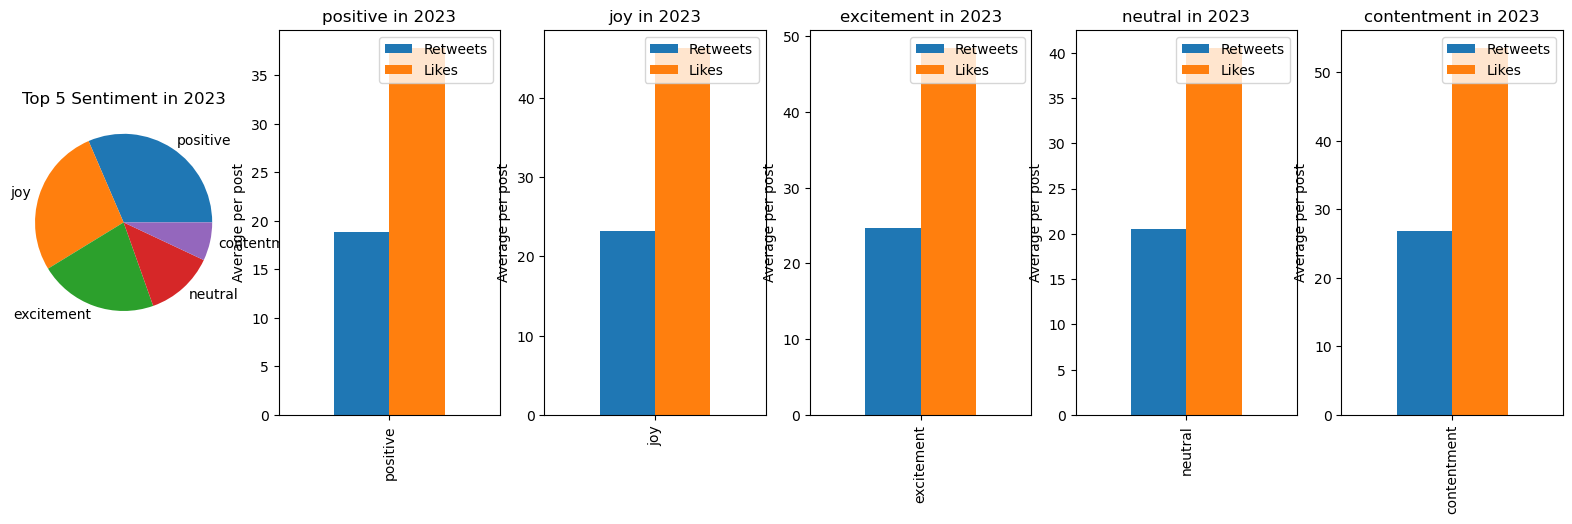

In [23]:
# draw several plots to visualize top 5 sentiment in each year, along with their numbers of retweets and likes.

# step 1: sort out years as an array for filtering data
years = sentiment_data['Year'].unique()
years.sort()

# step 2: use for loop to draw sentiment distribution for each year in chronological order
for year in years:
    # filter out top 5 sentiments in each year using value_counts
    top_5_sentiment = sentiment_data[sentiment_data['Year'] == year]['Sentiment'].value_counts().head(5)
    # design the basic layout
    fig, ax = plt.subplots(1, 6, figsize=(20, 5))
    # draw pie chart for top 5 sentiment distribution
    top_5_sentiment.plot(kind='pie', ax=ax[0])
    ax[0].set_title(f'Top 5 Sentiment in {year}')
    ax[0].set_ylabel('')   
    # group by each sentiment and calculate the average of retweets and likes
    for i, sentiment in enumerate(top_5_sentiment.index):
        sentiment_group = sentiment_data[(sentiment_data['Year'] == year) & (sentiment_data['Sentiment'] == sentiment)].groupby('Sentiment')[['Retweets', 'Likes']].mean().plot(kind='bar', ax=ax[i+1])
        ax[i+1].set_title(f'{sentiment} in {year}')
        ax[i+1].set_xlabel('')
        ax[i+1].set_ylabel('Average per post')


According to these graphs, I notice two trends:
1. In the 2010-2015, positive sentiments dictate social media posts, up until 2016.
2. As time progresses, sentiments are becoming more diversifed, and negative sentiments start to gain popularity since 2016,
 <br>(This observation can be flawed due to the time imbalance in this dataset)
3. The average number of likes is greater than the average number of retweets, and both figues stay stable over the years.

Now zoom in on the top 5 sentiments in 2023, and see the average of retweets and likes for each sentiment.

In [24]:
# filter data that only in year 2023
sentiment_data_2023 = sentiment_data[sentiment_data['Year'] == 2023]
sentiment_data_2023.info()

<class 'pandas.core.frame.DataFrame'>
Index: 287 entries, 0 to 729
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Text                   287 non-null    object 
 1   Sentiment              287 non-null    object 
 2   Timestamp              287 non-null    object 
 3   User                   287 non-null    object 
 4   Platform               287 non-null    object 
 5   Hashtags               287 non-null    object 
 6   Retweets               287 non-null    float64
 7   Likes                  287 non-null    float64
 8   Country                287 non-null    object 
 9   Year                   287 non-null    int64  
 10  Month                  287 non-null    int64  
 11  Day                    287 non-null    int64  
 12  Hour                   287 non-null    int64  
 13  Sentiment_Score        287 non-null    float64
 14  Sentiment_Nature       287 non-null    object 
 15  Text_Sentim

In [25]:
# use value_counts to filter out top 5 sentiments in 2023
top_5_sentiment_2023 = sentiment_data[sentiment_data['Year'] == 2023]['Sentiment'].value_counts().head(5)
sentiment_data_top_5_2023 = sentiment_data_2023[sentiment_data_2023['Sentiment'].isin(top_5_sentiment_2023.index)]
sentiment_data_top_5_2023.info()

<class 'pandas.core.frame.DataFrame'>
Index: 143 entries, 0 to 722
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Text                   143 non-null    object 
 1   Sentiment              143 non-null    object 
 2   Timestamp              143 non-null    object 
 3   User                   143 non-null    object 
 4   Platform               143 non-null    object 
 5   Hashtags               143 non-null    object 
 6   Retweets               143 non-null    float64
 7   Likes                  143 non-null    float64
 8   Country                143 non-null    object 
 9   Year                   143 non-null    int64  
 10  Month                  143 non-null    int64  
 11  Day                    143 non-null    int64  
 12  Hour                   143 non-null    int64  
 13  Sentiment_Score        143 non-null    float64
 14  Sentiment_Nature       143 non-null    object 
 15  Text_Sentim

Posts identified with major 5 sentiments in 2023 accounts for almost 46% (131/287) posts in 2023

Text(0.5, 1.0, 'Top 5 Sentiment in 2023')

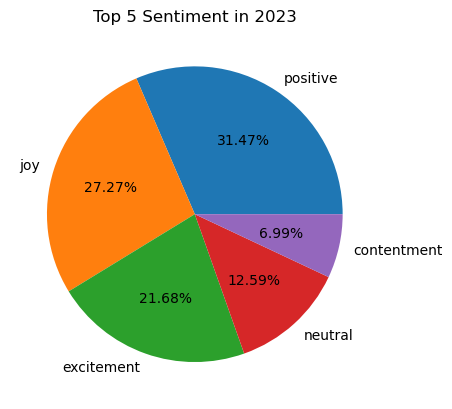

In [26]:
# draw pie chart for top 5 sentiment distribution in 2023
top_5_sentiment_2023.plot(kind='pie', autopct='%.2f%%')
plt.ylabel('')
plt.title('Top 5 Sentiment in 2023')

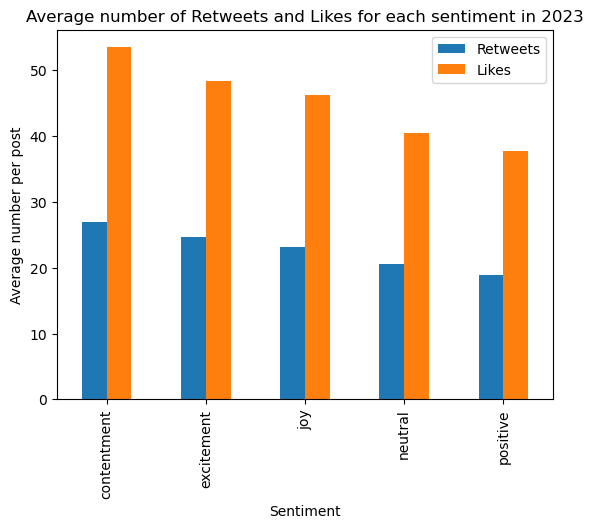

In [27]:
# draw countplot for the average number of retweets and likes for each sentiment in 2023
# groupby 'Sentiment' and calculate the average number of 'Retweets' and 'Likes'
sentiment_data_top_5_2023.groupby('Sentiment')[['Retweets', 'Likes']].mean().plot(kind='bar')
plt.title('Average number of Retweets and Likes for each sentiment in 2023')
plt.xlabel('Sentiment')
plt.ylabel('Average number per post')

plt.savefig('average_retweets_likes_2023.png')

### Question 3: How about sentiments in different social media platforms? 
<br>Is this dataset representative of sentiments across major platforms?

In [28]:
# find the most popular platforms, and make sure each platform is only counted once
sentiment_data['Platform'].value_counts()

Platform
Instagram     252
Facebook      224
Twitter       122
Twitter       114
Name: count, dtype: int64

In [29]:
# convert all texts to lowercase & strip the white spaces in the 'Platform' column
sentiment_data['Platform'] = sentiment_data['Platform'].str.lower()
sentiment_data['Platform'] = sentiment_data['Platform'].str.strip()
sentiment_data['Platform'].value_counts()

Platform
instagram    252
twitter      236
facebook     224
Name: count, dtype: int64

Text(0, 0.5, '')

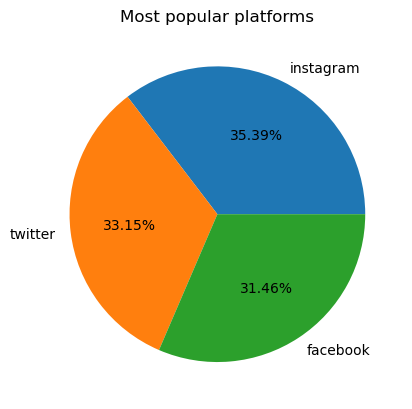

In [30]:
# visualize the most popular platforms using pie chart
sentiment_data['Platform'].value_counts().plot(kind='pie', autopct='%.2f%%')
plt.title('Most popular platforms')
plt.ylabel('')

It seems out dataset are balanced in terms of sampling from three major social media sites.
<br><br>But is it the case when we consider this composition in different years?

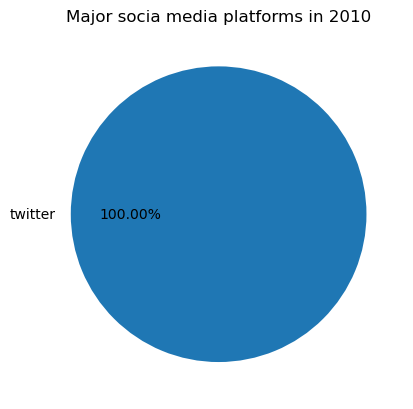

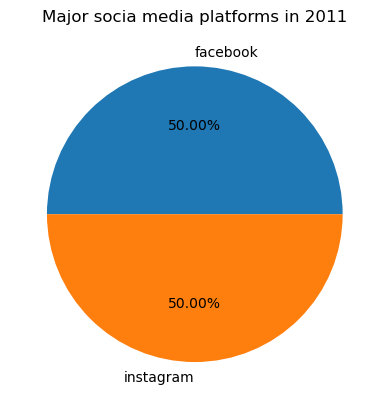

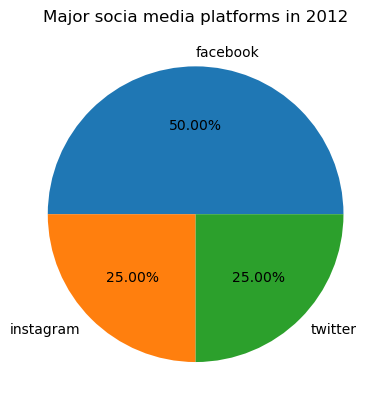

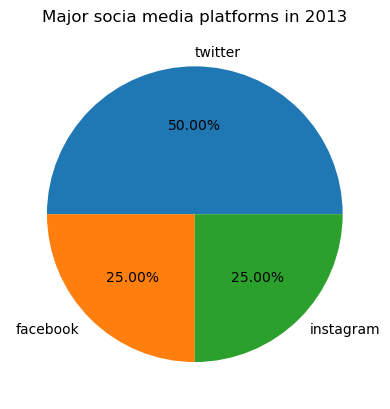

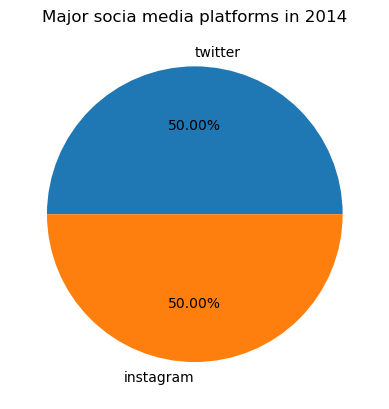

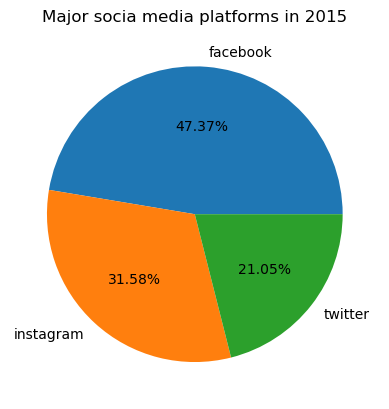

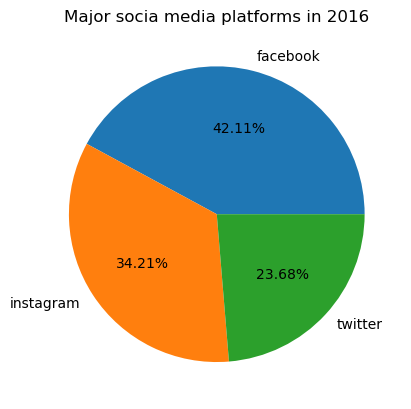

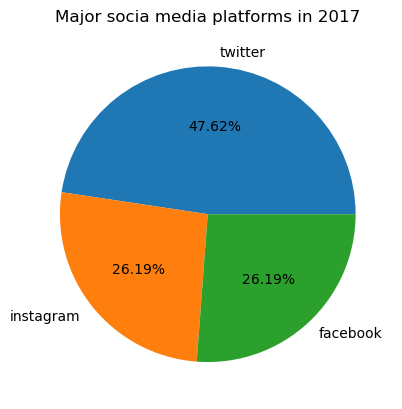

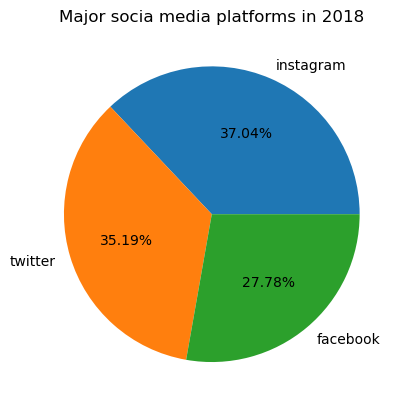

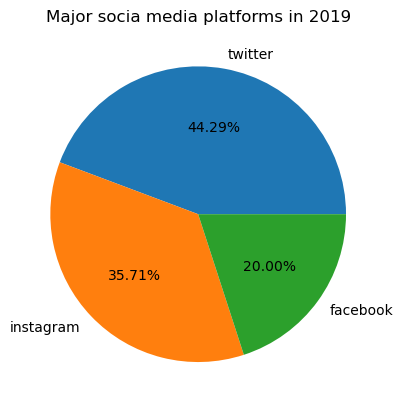

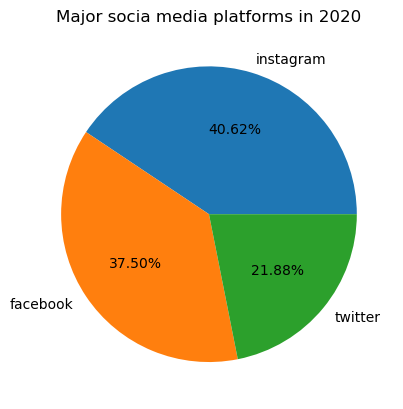

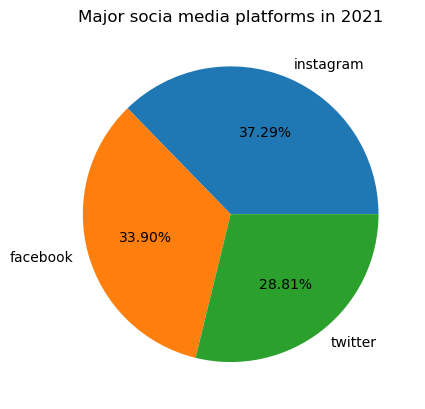

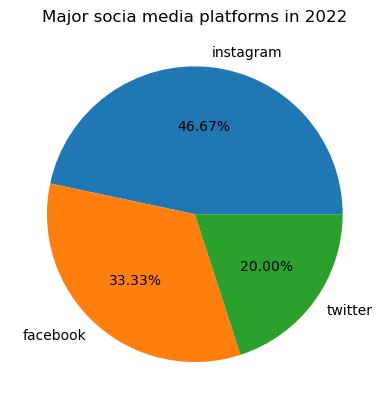

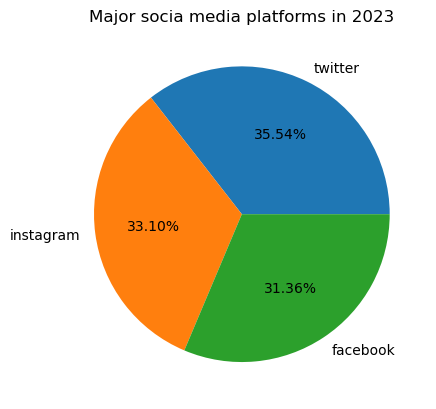

In [31]:
# use for loop to find major social media platforms for each year
for year in years:
    sentiment_data[sentiment_data['Year'] == year]['Platform'].value_counts().plot(kind='pie', autopct='%.2f%%')
    plt.title(f'Major socia media platforms in {year}')
    plt.ylabel('')
    plt.show()

Noticed Instagram did not emerge until 2011, <br>Despite the overall imbalance in time, 
 this dataset is balanced in sampling from three major social media sites in each year.

### Question 4: How does sentiment differ in different countries?

In [32]:
# find out what countries are contained in the dataset
sentiment_data['Country'].value_counts()

Country
 USA                    59
 USA                    51
 UK                     49
 Canada                 44
 Australia              36
 Canada                 31
 UK                     30
 USA                    20
 India                  19
 Canada                 17
 UK                     13
 Australia              12
 USA                    12
 India                  11
 Brazil                 11
 India                  10
 USA                    10
 France                 10
 Canada                 10
 Japan                  10
 Germany                 9
 USA                     9
USA                      9
 UK                      9
 Italy                   8
 India                   8
 UK                      8
 UK                      7
 Canada                  7
 Australia               6
 Canada                  6
 Canada                  6
 UK                      6
 India                   5
 India                   5
 UK                      5
 India              

USA is counted twice, need to trim for accuracy

In [33]:
# convert all texts to lowercase & strip the white spaces in the 'Platform' column
sentiment_data['Country'] = sentiment_data['Country'].str.lower()
sentiment_data['Country'] = sentiment_data['Country'].str.strip()
sentiment_data['Country'].value_counts()

Country
usa               184
uk                140
canada            132
australia          70
india              68
brazil             17
france             16
japan              15
germany            14
italy              11
south africa        6
spain               5
greece              5
netherlands         4
belgium             2
czech republic      2
denmark             2
switzerland         2
portugal            2
sweden              2
austria             1
jordan              1
peru                1
maldives            1
china               1
cambodia            1
norway              1
colombia            1
ireland             1
jamaica             1
kenya               1
scotland            1
thailand            1
Name: count, dtype: int64

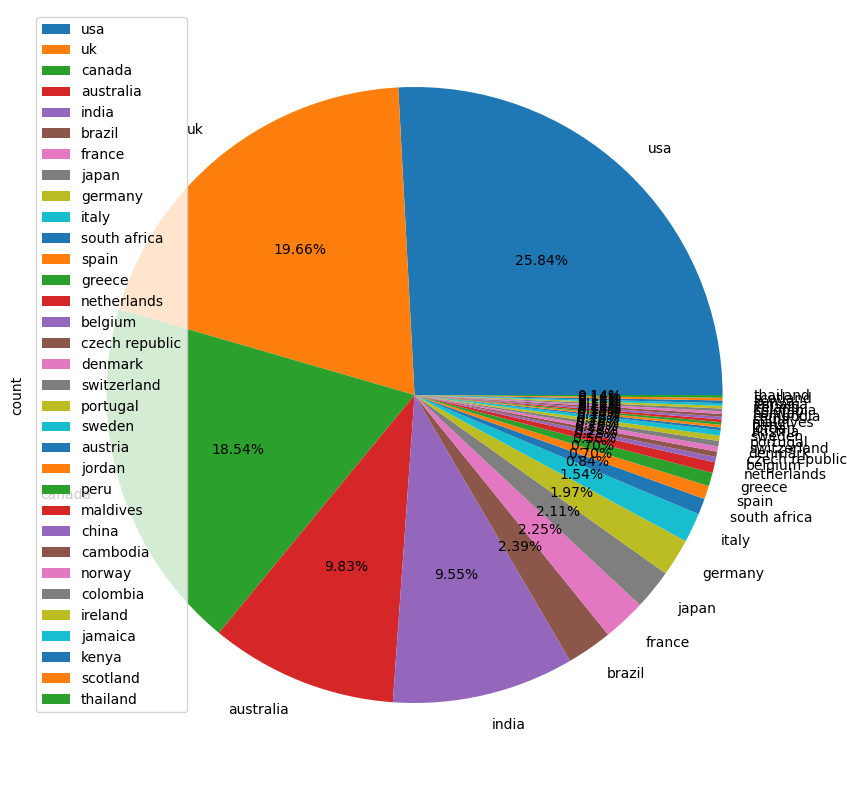

In [34]:
# visualize the result in pie chart
plt.figure(figsize=(15, 10))
sentiment_data['Country'].value_counts().plot(kind='pie', autopct='%.2f%%')
plt.legend(loc='best')

Base on the graph, we can see most(73.87%) posts sampled from this dataset come from English-speaking countries (USA, UK, Canasda, Australia).
<br><br>As a foreigner, I personally tend to express positivity when I speak a foreign language, and since all posts are written in English, will nativity of English affect the sentiment distribution?

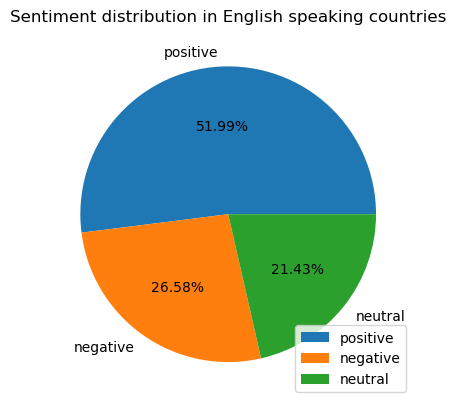

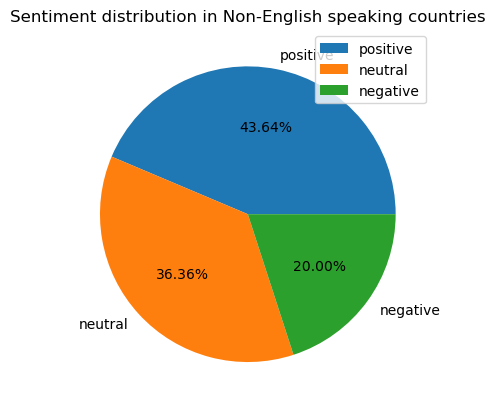

<Figure size 640x480 with 0 Axes>

In [35]:
# group countries into 'English' and 'Non-English', and find out their sentiment distribution
# create a list of English-speaking countries
english_countries = ['usa', 'uk', 'canada', 'australia', 'india', 'south africa', 'ireland', 'scotland']
# create a new column 'English' to indicate whather this post come from a Native English speaking country
sentiment_data['Native Language'] = sentiment_data['Country'].apply(lambda x: 'English' if x in english_countries else 'Non-English')
# sentiment_data['Native Language'].value_counts()
# draw pie charts to compare sentiment distribution in English country and non-English country posts
for language in sentiment_data['Native Language'].unique():
    sentiment_data[sentiment_data['Native Language'] == language]['Sentiment_Nature'].value_counts().plot(kind='pie', autopct='%.2f%%')
    plt.title(f'Sentiment distribution in {language} speaking countries')
    plt.ylabel('')
    plt.legend(loc='best')
    plt.show()
    plt.savefig(f'sentiment_distribution_in_{language}_speaking_countries.png')

Contrary to my original assumption, there is no major difference in the sentiment composition between native speaker posts and non-native speaker posts. <br><br>However, some posts are labeled inappropriately based on our sentiment-nature analysis, which can lead to an overestimation of 'neutral' sentiments, <br>especially in non-English speaking countries.

## Correlation Analysis

Now we want to take a further step to analyze the correlation between some attributes thet we have explored in the EDA stage, and compute a numeric result.
<br><br>Especially in the following ways:
1. Find out how year, platform, and country impact sentiment scores of the social media posts. 
2. Find out which type of sentiment tend to get more reposts & likes. <br>Does positive posts tend to get more retweets and likes? <br>What about neutral posts and negative posts?

### Find out the correlation between 'Sentiment_Score' and 'Year', 'Platform', and 'Native Language'

In [36]:
# create a new df for coorelation analysis
trim_data_1 = sentiment_data[['Sentiment_Nature', 'Platform', 'Native Language', 'Year']]
trim_data_1.head()

,Sentiment_Nature,Platform,Native Language,Year
id,,,,
0,positive,twitter,English,2023
1,negative,twitter,English,2023
2,positive,instagram,English,2023
3,positive,facebook,English,2023
4,neutral,instagram,English,2023


In [37]:
# use pd.get_dummies to categorize columns
dummy_data_1 = pd.get_dummies(data=trim_data_1)
dummy_data_1.head()

,Year,Sentiment_Nature_negative,Sentiment_Nature_neutral,Sentiment_Nature_positive,Platform_facebook,Platform_instagram,Platform_twitter,Native Language_English,Native Language_Non-English
id,,,,,,,,,
0,2023,False,False,True,False,False,True,True,False
1,2023,True,False,False,False,False,True,True,False
2,2023,False,False,True,False,True,False,True,False
3,2023,False,False,True,True,False,False,True,False
4,2023,False,True,False,False,True,False,True,False


In [38]:
# run correlation analysis on the dummy_data
corr_matrix_1 = dummy_data_1.corr()
# see only the correlation between 'Sentiment_Nature' and other columns
pd.set_option('display.max_rows', None)
print("\033[1mPositive Sentiment Correlation:\033[0m")
print(f'{corr_matrix_1['Sentiment_Nature_positive'].sort_values(ascending=False)}\n')
print("\033[1mNeutral Sentiment Correlation:\033[0m")
print(f'{corr_matrix_1['Sentiment_Nature_neutral'].sort_values(ascending=False)}\n')
print("\033[1mNegative Sentiment Correlation:\033[0m")
print(f'{corr_matrix_1['Sentiment_Nature_negative'].sort_values(ascending=False)}')

Positive Sentiment Correlation:
Sentiment_Nature_positive      1.000000
Year                           0.155176
Native Language_English        0.060414
Platform_facebook              0.032832
Platform_instagram             0.001353
Platform_twitter              -0.033762
Native Language_Non-English   -0.060414
Sentiment_Nature_neutral      -0.565775
Sentiment_Nature_negative     -0.594289
Name: Sentiment_Nature_positive, dtype: float64

Neutral Sentiment Correlation:
Sentiment_Nature_neutral       1.000000
Native Language_Non-English    0.126870
Platform_instagram             0.015086
Platform_twitter               0.006894
Platform_facebook             -0.022525
Native Language_English       -0.126870
Year                          -0.195594
Sentiment_Nature_negative     -0.326920
Sentiment_Nature_positive     -0.565775
Name: Sentiment_Nature_neutral, dtype: float64

Negative Sentiment Correlation:
Sentiment_Nature_negative      1.000000
Native Language_English        0.054503
Platform

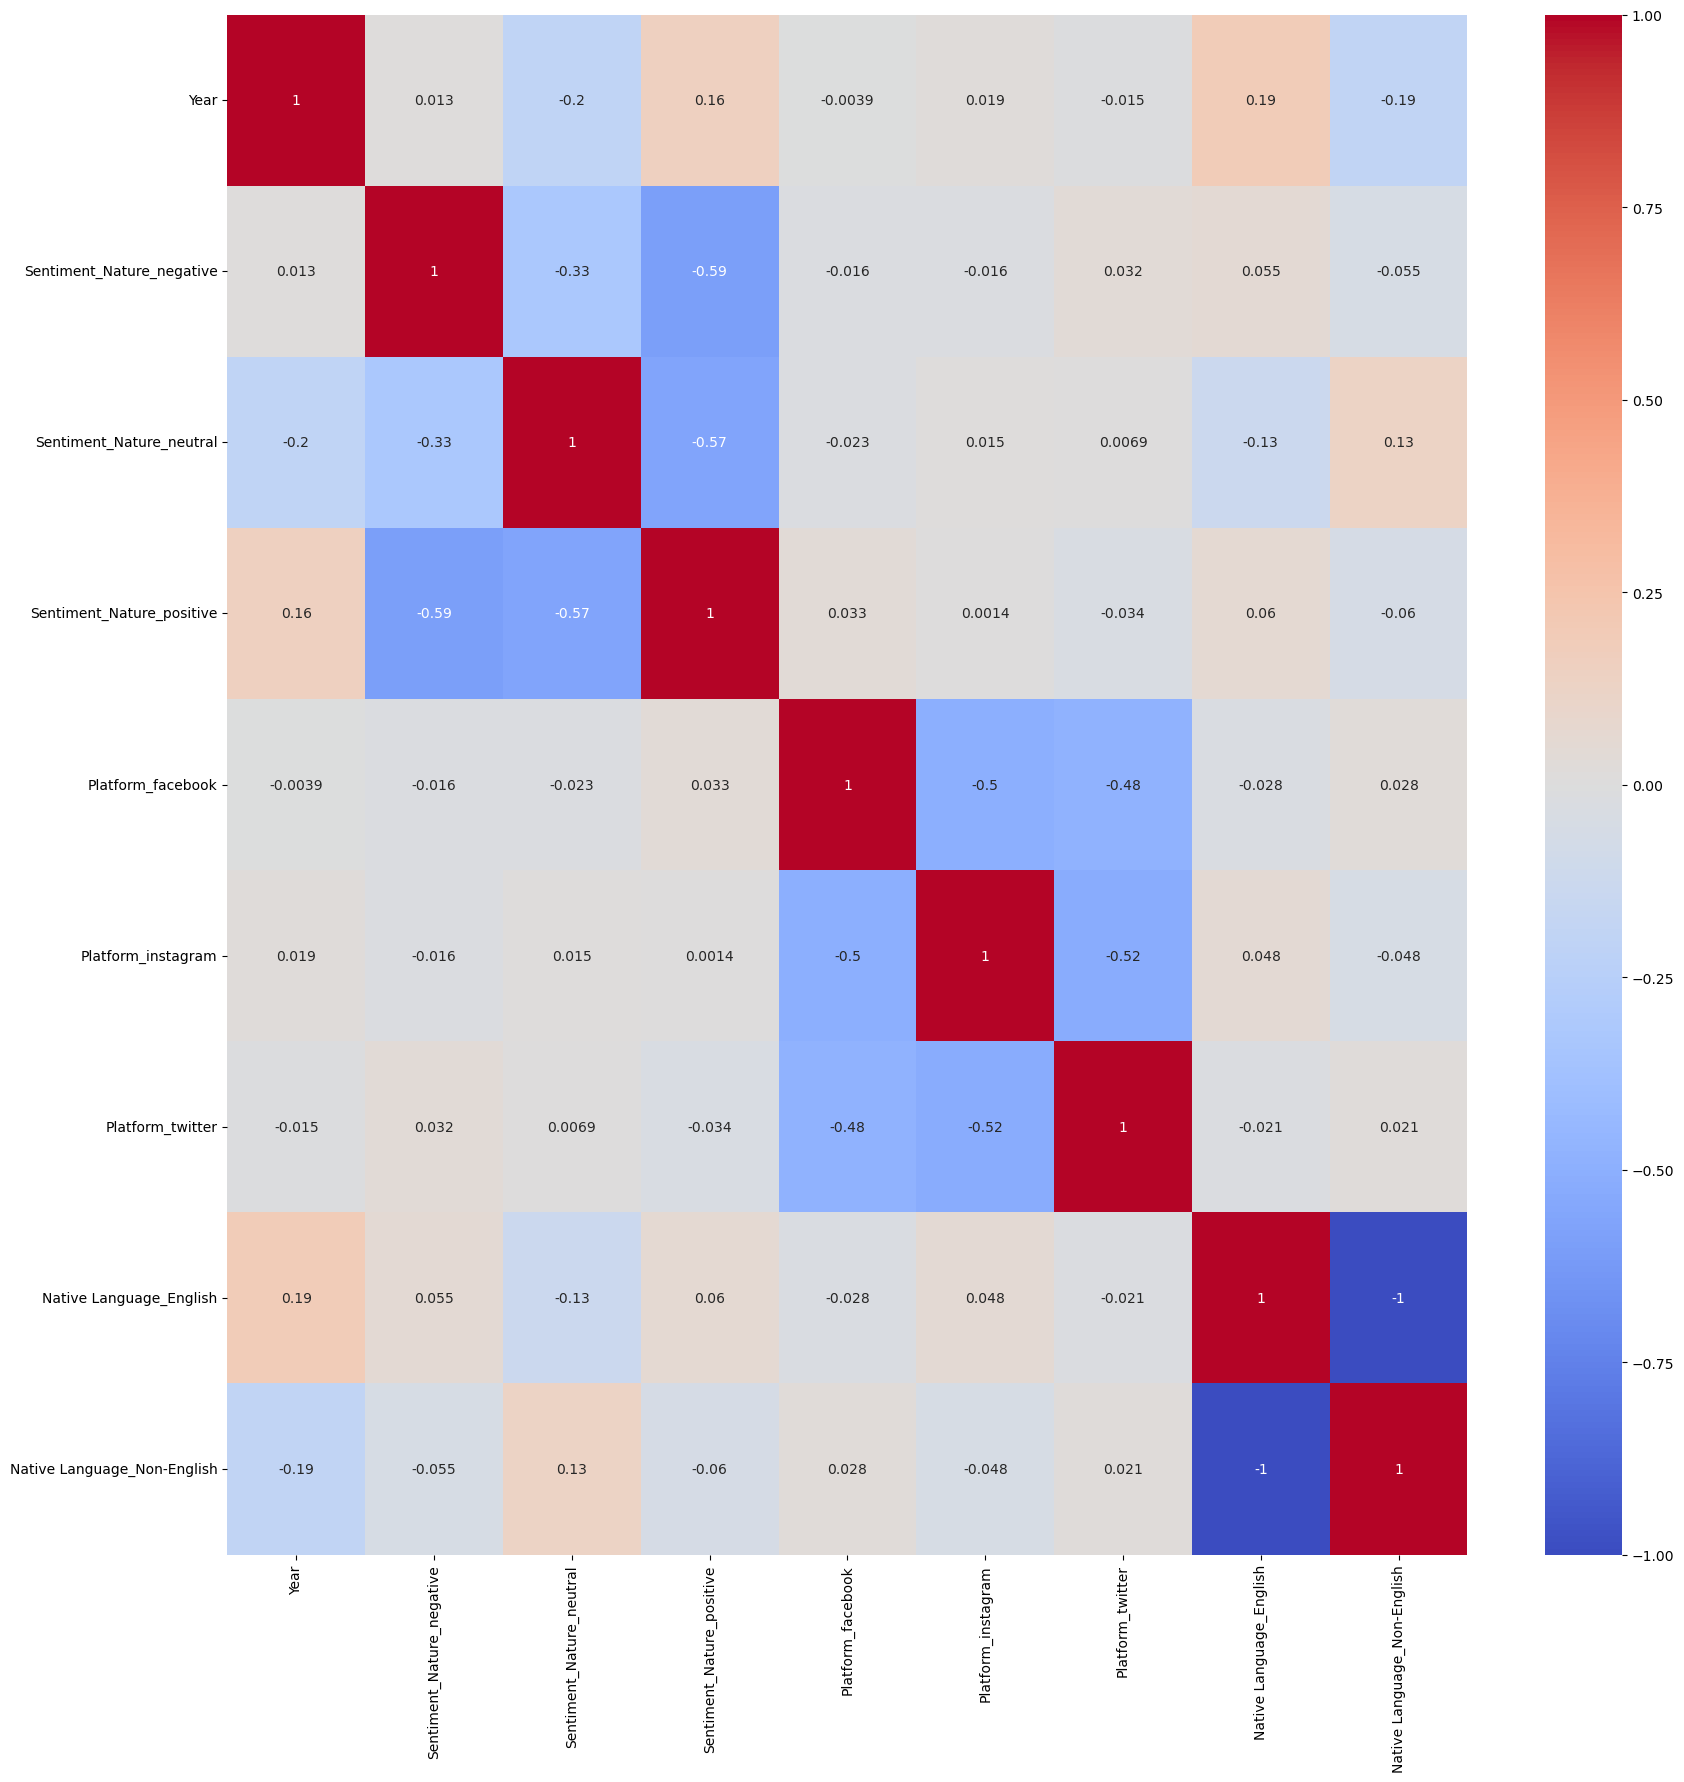

In [39]:
# visualize the correlation matrix using heatmap
plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix_1, cmap='coolwarm', annot=True)
plt.savefig('correlation_on_sentiments_to_other_impact.png')

Based on the correlation analysis, it is interesting to see: 
1. *Positive* posts are more time-sensitive, and becoming more positive over the year.
2. *Neutral* posts are more language-sensitive, where **non-English speaker** tend to write neutral posts, which might be due to the language barrier, or mislabeling in sentiments.
3. On the other hand, *negative* posts are more language-sensitive, in terms of having **English speaker** writing negiva posts, which might be due to the tendency to express negative feelings in native language.

### Find out what kind of sentiment tend to get more reposts & likes

In [40]:
# create a correlation matrix for sentiment natures and reposts & likes
trim_data_2 = sentiment_data[['Sentiment_Nature', 'Retweets', 'Likes']]
dummy_data_2 = pd.get_dummies(data=trim_data_2)
corr_matrix_2 = dummy_data_2.corr()

pd.set_option('display.max_rows', None)
print("\033[1mPositive Sentiment Correlation:\033[0m")
print(f'{corr_matrix_2['Sentiment_Nature_positive'].sort_values(ascending=False)}\n')
print("\033[1mNeutral Sentiment Correlation:\033[0m")
print(f'{corr_matrix_2['Sentiment_Nature_neutral'].sort_values(ascending=False)}\n')
print("\033[1mNegative Sentiment Correlation:\033[0m")
print(f'{corr_matrix_2['Sentiment_Nature_negative'].sort_values(ascending=False)}')

Positive Sentiment Correlation:
Sentiment_Nature_positive    1.000000
Retweets                     0.208841
Likes                        0.206684
Sentiment_Nature_neutral    -0.565775
Sentiment_Nature_negative   -0.594289
Name: Sentiment_Nature_positive, dtype: float64

Neutral Sentiment Correlation:
Sentiment_Nature_neutral     1.000000
Likes                        0.109842
Retweets                     0.108669
Sentiment_Nature_negative   -0.326920
Sentiment_Nature_positive   -0.565775
Name: Sentiment_Nature_neutral, dtype: float64

Negative Sentiment Correlation:
Sentiment_Nature_negative    1.000000
Sentiment_Nature_neutral    -0.326920
Likes                       -0.344023
Retweets                    -0.345352
Sentiment_Nature_positive   -0.594289
Name: Sentiment_Nature_negative, dtype: float64


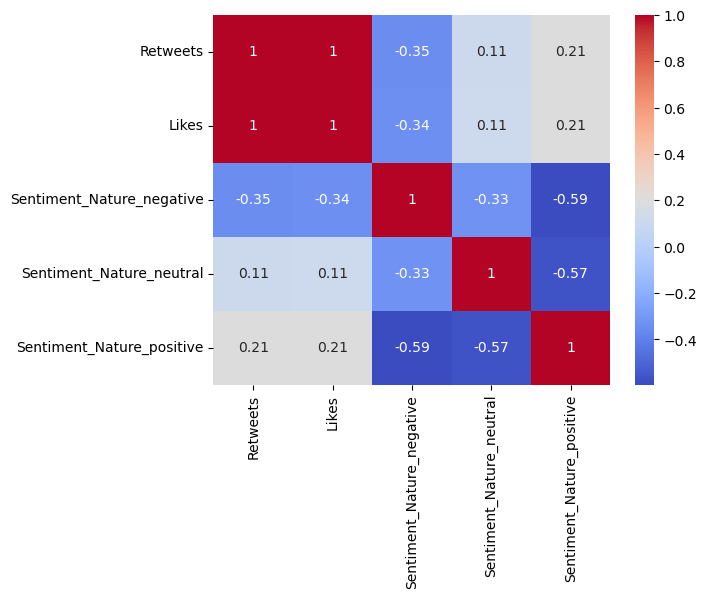

In [41]:
sns.heatmap(corr_matrix_2, cmap='coolwarm', annot=True)
plt.savefig('correlation_on_sentiments_to_retweets_and_likes.png')

Based on the correlation analysis, it is interesting to see:
<br>
1. *Positive* posts tend to get more retweets and likes, which validate our hypothesis.
2. *Neutral* posts have tend to get less retweets and likes, but they are still positively correlated.
3. *Negative* posts shows all negative coorelation, which shows that negative posts do not tend to get more likes and retweets.

## Conclusion

Based on the two correlation analysis, the linear relationship between sentiment natures and other labels are **vague**, <br>so there is no need to explore their correlation using linear regression or logistics regression.

*Thank you for reading!*